### Importing packages

Let's start importing the packages that we will use is this analysis.

In [1]:
import glob
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

---

### Reading the data

In [2]:
paths = sorted(glob.glob('dataset/sales_[0-1][0-9].csv'))
paths

['dataset/sales_01.csv',
 'dataset/sales_02.csv',
 'dataset/sales_03.csv',
 'dataset/sales_04.csv',
 'dataset/sales_05.csv',
 'dataset/sales_06.csv',
 'dataset/sales_07.csv',
 'dataset/sales_08.csv',
 'dataset/sales_09.csv',
 'dataset/sales_10.csv',
 'dataset/sales_11.csv',
 'dataset/sales_12.csv']

In [3]:
sales = pd.concat([pd.read_csv(path) for path in paths])
sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,141234,iPhone,1,700,01/22 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25 11:59,"387 10th St, Austin, TX 73301"


---

### Cleaning the data

In [4]:
sales[sales.isnull().any(axis=1)].head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sales[sales['product'] == 'product'].head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
1073,order_id,product,quantity_ordered,price_each,order _date,purchase_address
1102,order_id,product,quantity_ordered,price_each,order _date,purchase_address
1194,order_id,product,quantity_ordered,price_each,order _date,purchase_address
1897,order_id,product,quantity_ordered,price_each,order _date,purchase_address
2463,order_id,product,quantity_ordered,price_each,order _date,purchase_address


In [6]:
sales = sales.dropna(how='all')
sales = sales[sales['product'] != 'product']

In [7]:
sales.to_csv('dataset/sales.csv', index=False)

---

### Analysing the data

In [8]:
sales = pd.read_csv('dataset/sales.csv')

In [9]:
sales['order_date'].head()

0    01/22 21:25
1    01/28 14:15
2    01/17 13:33
3    01/05 20:33
4    01/25 11:59
Name: order_date, dtype: object

In [10]:
sales['order_date'] = pd.to_datetime(sales['order_date'], format='%m/%d %H:%M')

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  int64         
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  int64         
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 7.1+ MB


#### a) What products had the most sales?

In [12]:
sales['price_total'] = sales['quantity_ordered'] * sales['price_each']
sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,price_total
0,141234,iPhone,1,700.00,1900-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,1900-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,1900-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,1900-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,1900-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99


In [13]:
per_product = sales.groupby('product')['price_total'].sum()
per_product.head()

product
20in Monitor               454148.71
27in 4K Gaming Monitor    2435097.56
27in FHD Monitor          1132424.50
34in Ultrawide Monitor    2355558.01
AA Batteries (4-pack)      106118.40
Name: price_total, dtype: float64

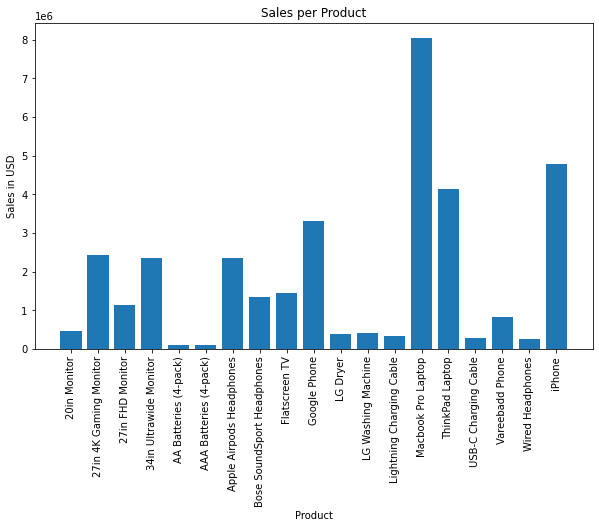

In [14]:
plt.figure(figsize=(10, 6))

plt.bar(per_product.index, per_product.values)

plt.title('Sales per Product')
plt.xlabel('Product')
plt.ylabel('Sales in USD')
plt.xticks(rotation='vertical')

plt.show()

#### b) What cities had the most sales?

In [15]:
def get_city(address):
    city = address.split(', ')[1]
    state = address.split()[-2]
    return f'{city}, {state}'

sales['purchase_city'] = sales['purchase_address'].map(get_city)
sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,price_total,purchase_city
0,141234,iPhone,1,700.00,1900-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,"Boston, MA"
1,141235,Lightning Charging Cable,1,14.95,1900-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,"Portland, OR"
2,141236,Wired Headphones,2,11.99,1900-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,"San Francisco, CA"
3,141237,27in FHD Monitor,1,149.99,1900-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,"Los Angeles, CA"
4,141238,Wired Headphones,1,11.99,1900-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,"Austin, TX"


In [16]:
per_city = sales.groupby('purchase_city')['price_total'].sum()
per_city.head()

purchase_city
Atlanta, GA        2.795499e+06
Austin, TX         1.819582e+06
Boston, MA         3.661642e+06
Dallas, TX         2.767975e+06
Los Angeles, CA    5.452571e+06
Name: price_total, dtype: float64

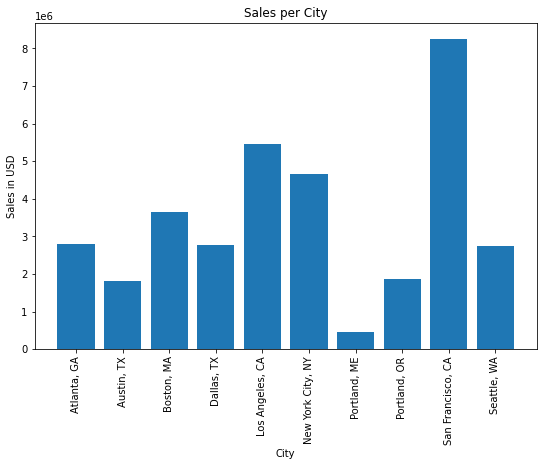

In [17]:
plt.figure(figsize=(9, 6))

plt.bar(per_city.index, per_city.values)

plt.title('Sales per City')
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.xticks(rotation='vertical')

plt.show()

#### c) What time should we display advertisiments to maximize likelihood of custumer's buiying product?

In [18]:
sales['order_hour'] = sales['order_date'].dt.hour
sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,price_total,purchase_city,order_hour
0,141234,iPhone,1,700.00,1900-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,"Boston, MA",21
1,141235,Lightning Charging Cable,1,14.95,1900-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,"Portland, OR",14
2,141236,Wired Headphones,2,11.99,1900-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,"San Francisco, CA",13
3,141237,27in FHD Monitor,1,149.99,1900-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,"Los Angeles, CA",20
4,141238,Wired Headphones,1,11.99,1900-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,"Austin, TX",11


In [19]:
per_hour = sales.groupby('order_hour')['price_total'].sum()
per_hour.head()

order_hour
0    713721.27
1    460866.88
2    234851.44
3    145757.89
4    162661.01
Name: price_total, dtype: float64

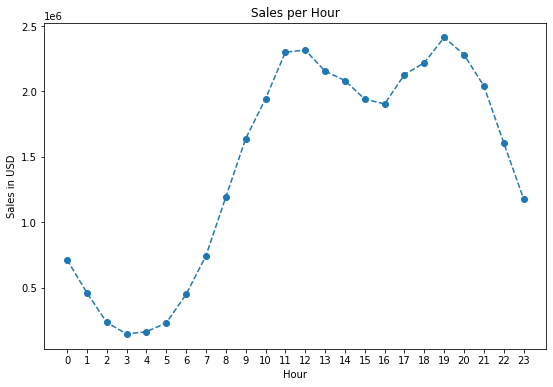

In [20]:
plt.figure(figsize=(9, 6))

plt.plot(per_hour.index, per_hour.values, 'o--')

plt.title('Sales per Hour')
plt.xlabel('Hour')
plt.ylabel('Sales in USD')
plt.xticks(per_hour.index)

plt.show()

#### d) What months had the most sales?

In [21]:
sales['order_month'] = sales['order_date'].dt.month
sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,price_total,purchase_city,order_hour,order_month
0,141234,iPhone,1,700.00,1900-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,"Boston, MA",21,1
1,141235,Lightning Charging Cable,1,14.95,1900-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,"Portland, OR",14,1
2,141236,Wired Headphones,2,11.99,1900-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,"San Francisco, CA",13,1
3,141237,27in FHD Monitor,1,149.99,1900-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,"Los Angeles, CA",20,1
4,141238,Wired Headphones,1,11.99,1900-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,"Austin, TX",11,1


In [22]:
per_month = sales.groupby('order_month')['price_total'].sum()
per_month.head()

order_month
1    1.822257e+06
2    2.202022e+06
3    2.807100e+06
4    3.390670e+06
5    3.152607e+06
Name: price_total, dtype: float64

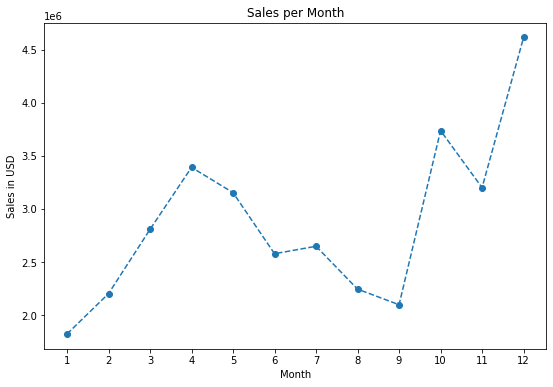

In [23]:
plt.figure(figsize=(9, 6))

plt.plot(per_month.index, per_month.values, 'o--')

plt.title('Sales per Month')
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.xticks(per_month.index)

plt.show()

#### e) What products are most often sold together?

In [24]:
sales[sales['order_id'] == 302991]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,price_total,purchase_city,order_hour,order_month
168603,302991,Google Phone,1,600.00,1900-12-26 07:48:00,"605 Washington St, Los Angeles, CA 90001",600.00,"Los Angeles, CA",7,12
168604,302991,USB-C Charging Cable,1,11.95,1900-12-26 07:48:00,"605 Washington St, Los Angeles, CA 90001",11.95,"Los Angeles, CA",7,12
168605,302991,Wired Headphones,2,11.99,1900-12-26 07:48:00,"605 Washington St, Los Angeles, CA 90001",23.98,"Los Angeles, CA",7,12


In [25]:
prods_per_order = sales.groupby('order_id')['product'].apply(list)
prods_per_order.head()

order_id
141234                      [iPhone]
141235    [Lightning Charging Cable]
141236            [Wired Headphones]
141237            [27in FHD Monitor]
141238            [Wired Headphones]
Name: product, dtype: object

In [26]:
prods_per_order.loc[302991]

['Google Phone', 'USB-C Charging Cable', 'Wired Headphones']

In [27]:
list(itertools.combinations(prods_per_order.loc[302991], 2))

[('Google Phone', 'USB-C Charging Cable'),
 ('Google Phone', 'Wired Headphones'),
 ('USB-C Charging Cable', 'Wired Headphones')]

In [28]:
prods_pairs_dict = {}
for prods in prods_per_order:
    combs = itertools.combinations(prods, 2)
    for comb in combs:
        comb = ', '.join(comb)
        try:
            prods_pairs_dict[comb] += 1
        except KeyError:
            prods_pairs_dict[comb] = 1

In [29]:
prods_pairs = pd.Series(prods_pairs_dict, index=prods_pairs_dict.keys())
prods_pairs.head()

USB-C Charging Cable, Wired Headphones             160
Apple Airpods Headphones, AA Batteries (4-pack)     29
Vareebadd Phone, Wired Headphones                  143
Google Phone, USB-C Charging Cable                 987
Google Phone, Bose SoundSport Headphones           220
dtype: int64

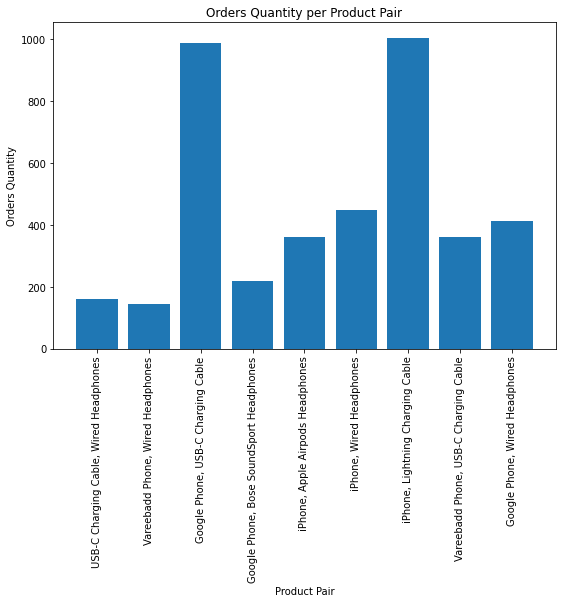

In [30]:
plt.figure(figsize=(9, 6))

top_prods_pairs = prods_pairs[prods_pairs > 100]

plt.bar(top_prods_pairs.index, top_prods_pairs.values)

plt.title('Orders Quantity per Product Pair')
plt.xlabel('Product Pair')
plt.ylabel('Orders Quantity')
plt.xticks(rotation='vertical')

plt.show()